In [1]:
#Import libraries as needed

import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_auc_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.feature_importance_plot import feature_importance_plot
from src.learning_curve_plot import learning_curve_plot


# Read and explore de data

In [2]:
#Read data file

audio = pd.read_csv("../data/audio_data_w_genres.csv")
audio.head()

,filename,tempo,beats,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [3]:
#Drop Filename, unnecessary 

audio = audio.drop(labels='filename',axis=1)
audio.head()

,tempo,beats,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,103.359375,50,0.380260,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,95.703125,44,0.306451,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,151.999081,75,0.253487,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,184.570312,91,0.269320,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,161.499023,74,0.391059,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [4]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               1003 non-null   float64
 1   beats               1003 non-null   int64  
 2   chroma_stft         1003 non-null   float64
 3   spectral_centroid   1003 non-null   float64
 4   spectral_bandwidth  1003 non-null   float64
 5   rolloff             1003 non-null   float64
 6   zero_crossing_rate  1003 non-null   float64
 7   mfcc1               1003 non-null   float64
 8   mfcc2               1003 non-null   float64
 9   mfcc3               1003 non-null   float64
 10  mfcc4               1003 non-null   float64
 11  mfcc5               1003 non-null   float64
 12  mfcc6               1003 non-null   float64
 13  mfcc7               1003 non-null   float64
 14  mfcc8               1003 non-null   float64
 15  mfcc9               1003 non-null   float64
 16  mfcc10

<AxesSubplot:xlabel='label', ylabel='beats'>

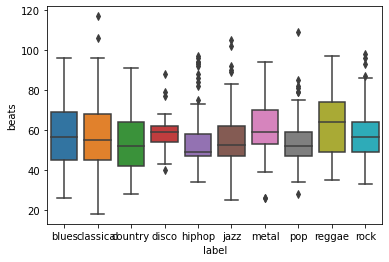

In [5]:
#Boxplot with the beats
sns.boxplot(x= 'label', y='beats', data=audio)

<AxesSubplot:xlabel='label', ylabel='tempo'>

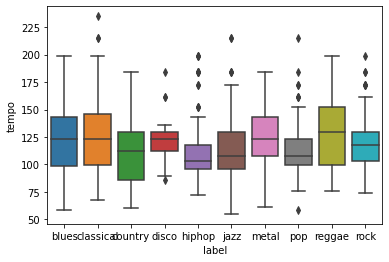

In [6]:
#Boxplot with the tempo
sns.boxplot(x= 'label', y='tempo', data=audio)

<AxesSubplot:xlabel='label', ylabel='spectral_bandwidth'>

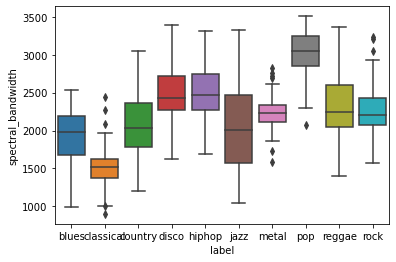

In [7]:
#Boxplot with the spectral_bandwidth
sns.boxplot(x= 'label', y='spectral_bandwidth', data=audio)

In [8]:
#Encode the label column!

label_encoder = preprocessing.LabelEncoder()
audio['label_encoded'] = label_encoder.fit_transform(audio['label'])
audio = audio.drop(labels='label',axis=1)
audio.head()

,tempo,beats,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label_encoded
0,103.359375,50,0.380260,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,95.703125,44,0.306451,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,151.999081,75,0.253487,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,184.570312,91,0.269320,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,161.499023,74,0.391059,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0


In [9]:
#Check if there is duplicated data
print("# of duplicated rows of data:", audio[audio.duplicated(keep = False)].shape[0])

# of duplicated rows of data: 31


In [10]:
#We have to remove that data
audio = audio[~audio.duplicated(keep = 'first')]

In [11]:
#Confirm there is no more duplicated data
print("# of duplicated rows of data:", audio[audio.duplicated(keep = False)].shape[0])

# of duplicated rows of data: 0


In [12]:
#check if correlated variables
threshold = 0.85 # define threshold

corr_matrix = audio.corr().abs() # calculate the correlation matrix with 
high_corr_var = np.where(corr_matrix >= threshold) # identify variables that have correlations above defined threshold
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                         for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables


high_corr_var

[('tempo', 'beats', 0.97),
 ('spectral_centroid', 'spectral_bandwidth', 0.91),
 ('spectral_centroid', 'rolloff', 0.98),
 ('spectral_centroid', 'zero_crossing_rate', 0.88),
 ('spectral_centroid', 'mfcc2', 0.94),
 ('spectral_bandwidth', 'rolloff', 0.96),
 ('spectral_bandwidth', 'mfcc2', 0.9),
 ('rolloff', 'mfcc2', 0.93)]

In [13]:
#Lets drop correlated values
audio = audio.drop(labels='beats',axis=1)
audio = audio.drop(labels='rolloff',axis=1)
audio = audio.drop(labels='spectral_centroid',axis=1)
audio = audio.drop(labels='mfcc2',axis=1)

In [14]:
#check if correlated variables
threshold = 0.85 # define threshold

corr_matrix = audio.corr().abs() # calculate the correlation matrix with 
high_corr_var = np.where(corr_matrix >= threshold) # identify variables that have correlations above defined threshold
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                         for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables


high_corr_var

[]

In [15]:
#Shape of data
audio.shape

#987 rows & 24 columns

(987, 24)

# Missing data

In [16]:
#Do we have missing data? (apparently no) Handle missing data? (no missing data)
audio.isnull().sum()

tempo                 0
chroma_stft           0
spectral_bandwidth    0
zero_crossing_rate    0
mfcc1                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
label_encoded         0
dtype: int64

In [17]:
#Data information

audio.info()

#3 more audio files mmm, let's ignore them

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tempo               987 non-null    float64
 1   chroma_stft         987 non-null    float64
 2   spectral_bandwidth  987 non-null    float64
 3   zero_crossing_rate  987 non-null    float64
 4   mfcc1               987 non-null    float64
 5   mfcc3               987 non-null    float64
 6   mfcc4               987 non-null    float64
 7   mfcc5               987 non-null    float64
 8   mfcc6               987 non-null    float64
 9   mfcc7               987 non-null    float64
 10  mfcc8               987 non-null    float64
 11  mfcc9               987 non-null    float64
 12  mfcc10              987 non-null    float64
 13  mfcc11              987 non-null    float64
 14  mfcc12              987 non-null    float64
 15  mfcc13              987 non-null    float64
 16  mfcc14  

In [18]:
#Lets try describing this

audio.describe()

,tempo,chroma_stft,spectral_bandwidth,zero_crossing_rate,mfcc1,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label_encoded
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,...,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,119.622039,0.377854,2239.686314,0.103120,-145.121078,-8.778399,36.258412,-1.110542,14.614901,-5.132673,...,4.424727,-4.732226,1.766220,-3.862083,1.110121,-3.939917,0.484466,-2.286274,-1.100632,4.483283
std,28.281385,0.081841,526.724400,0.041728,100.696264,21.516673,16.648538,12.225778,11.831187,9.920024,...,6.724914,6.088859,5.015409,4.870264,4.565600,4.541511,3.877095,3.712570,3.849776,2.884960
min,54.978391,0.171782,897.994319,0.021701,-552.064063,-89.901142,-18.768461,-38.903451,-28.424546,-32.933588,...,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203,0.000000
25%,99.384014,0.319249,1901.089391,0.069839,-201.891830,-23.921427,24.138033,-10.061291,5.073220,-12.865895,...,-0.578673,-9.293435,-1.670464,-7.124887,-1.860705,-7.153306,-2.044931,-4.609638,-3.375820,2.000000
50%,117.453835,0.380916,2219.090892,0.099030,-121.066584,-10.702122,36.841104,0.050252,14.914179,-5.669747,...,3.856510,-4.152501,1.878598,-3.597213,1.198567,-4.050388,0.659429,-2.377801,-1.172830,4.000000
75%,135.999178,0.434662,2576.499682,0.131522,-73.426158,5.550685,47.986026,7.956127,23.859402,2.970403,...,9.603460,-0.159541,5.127193,-0.321906,4.290809,-0.836889,3.093848,0.166472,1.298917,7.000000
max,234.907670,0.663573,3509.578677,0.274829,42.034587,56.666090,80.691273,31.461661,45.173178,21.835769,...,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966,9.000000


array([[<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'chroma_stft'}>,
        <AxesSubplot:title={'center':'spectral_bandwidth'}>,
        <AxesSubplot:title={'center':'zero_crossing_rate'}>,
        <AxesSubplot:title={'center':'mfcc1'}>],
       [<AxesSubplot:title={'center':'mfcc3'}>,
        <AxesSubplot:title={'center':'mfcc4'}>,
        <AxesSubplot:title={'center':'mfcc5'}>,
        <AxesSubplot:title={'center':'mfcc6'}>,
        <AxesSubplot:title={'center':'mfcc7'}>],
       [<AxesSubplot:title={'center':'mfcc8'}>,
        <AxesSubplot:title={'center':'mfcc9'}>,
        <AxesSubplot:title={'center':'mfcc10'}>,
        <AxesSubplot:title={'center':'mfcc11'}>,
        <AxesSubplot:title={'center':'mfcc12'}>],
       [<AxesSubplot:title={'center':'mfcc13'}>,
        <AxesSubplot:title={'center':'mfcc14'}>,
        <AxesSubplot:title={'center':'mfcc15'}>,
        <AxesSubplot:title={'center':'mfcc16'}>,
        <AxesSubplot:title={'center':'mfcc17'}

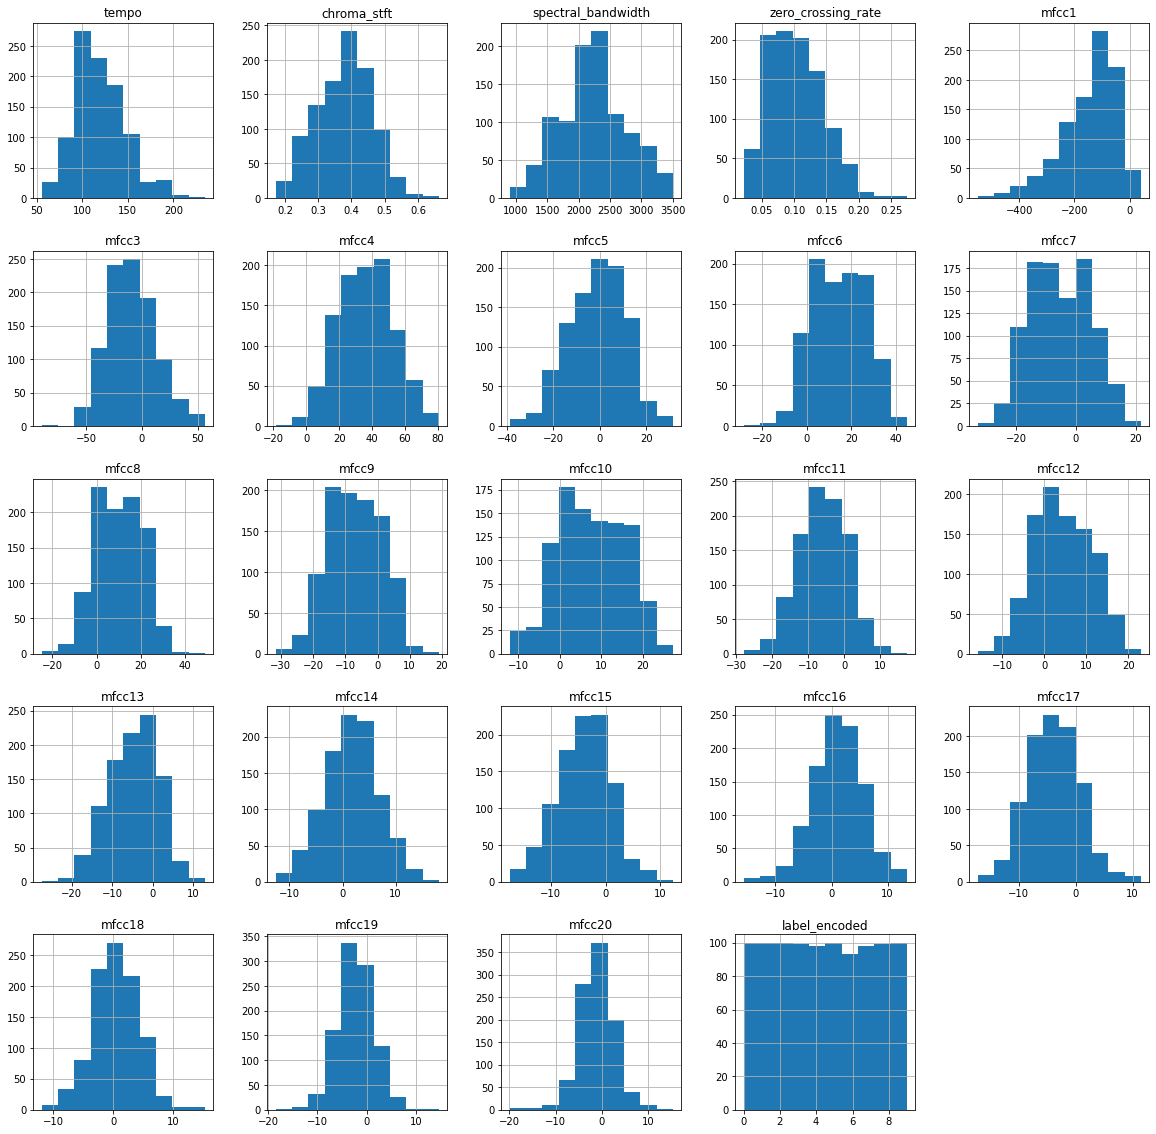

In [19]:
#Histograms! always helpful

plt.rcParams["figure.figsize"] = (20,20)
audio.hist()

#We're gonna put special attention to mfcc1, something sketchy going on in there

In [20]:
#Lets check the standard deviation!

audio.std()

tempo                  28.281385
chroma_stft             0.081841
spectral_bandwidth    526.724400
zero_crossing_rate      0.041728
mfcc1                 100.696264
mfcc3                  21.516673
mfcc4                  16.648538
mfcc5                  12.225778
mfcc6                  11.831187
mfcc7                   9.920024
mfcc8                  10.446289
mfcc9                   8.249604
mfcc10                  7.914605
mfcc11                  6.790605
mfcc12                  6.724914
mfcc13                  6.088859
mfcc14                  5.015409
mfcc15                  4.870264
mfcc16                  4.565600
mfcc17                  4.541511
mfcc18                  3.877095
mfcc19                  3.712570
mfcc20                  3.849776
label_encoded           2.884960
dtype: float64

In [21]:
#We identify 2 features with very little std, so let's drop them, for the sake of simplicity

audio = audio.drop(labels='chroma_stft',axis=1)
audio = audio.drop(labels='zero_crossing_rate',axis=1)
audio.std()

#chroma_stft and zero_crossing_rate, you are the weakest link. Good bye.

tempo                  28.281385
spectral_bandwidth    526.724400
mfcc1                 100.696264
mfcc3                  21.516673
mfcc4                  16.648538
mfcc5                  12.225778
mfcc6                  11.831187
mfcc7                   9.920024
mfcc8                  10.446289
mfcc9                   8.249604
mfcc10                  7.914605
mfcc11                  6.790605
mfcc12                  6.724914
mfcc13                  6.088859
mfcc14                  5.015409
mfcc15                  4.870264
mfcc16                  4.565600
mfcc17                  4.541511
mfcc18                  3.877095
mfcc19                  3.712570
mfcc20                  3.849776
label_encoded           2.884960
dtype: float64

count    987.000000
mean       4.483283
std        2.884960
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: label_encoded, dtype: float64

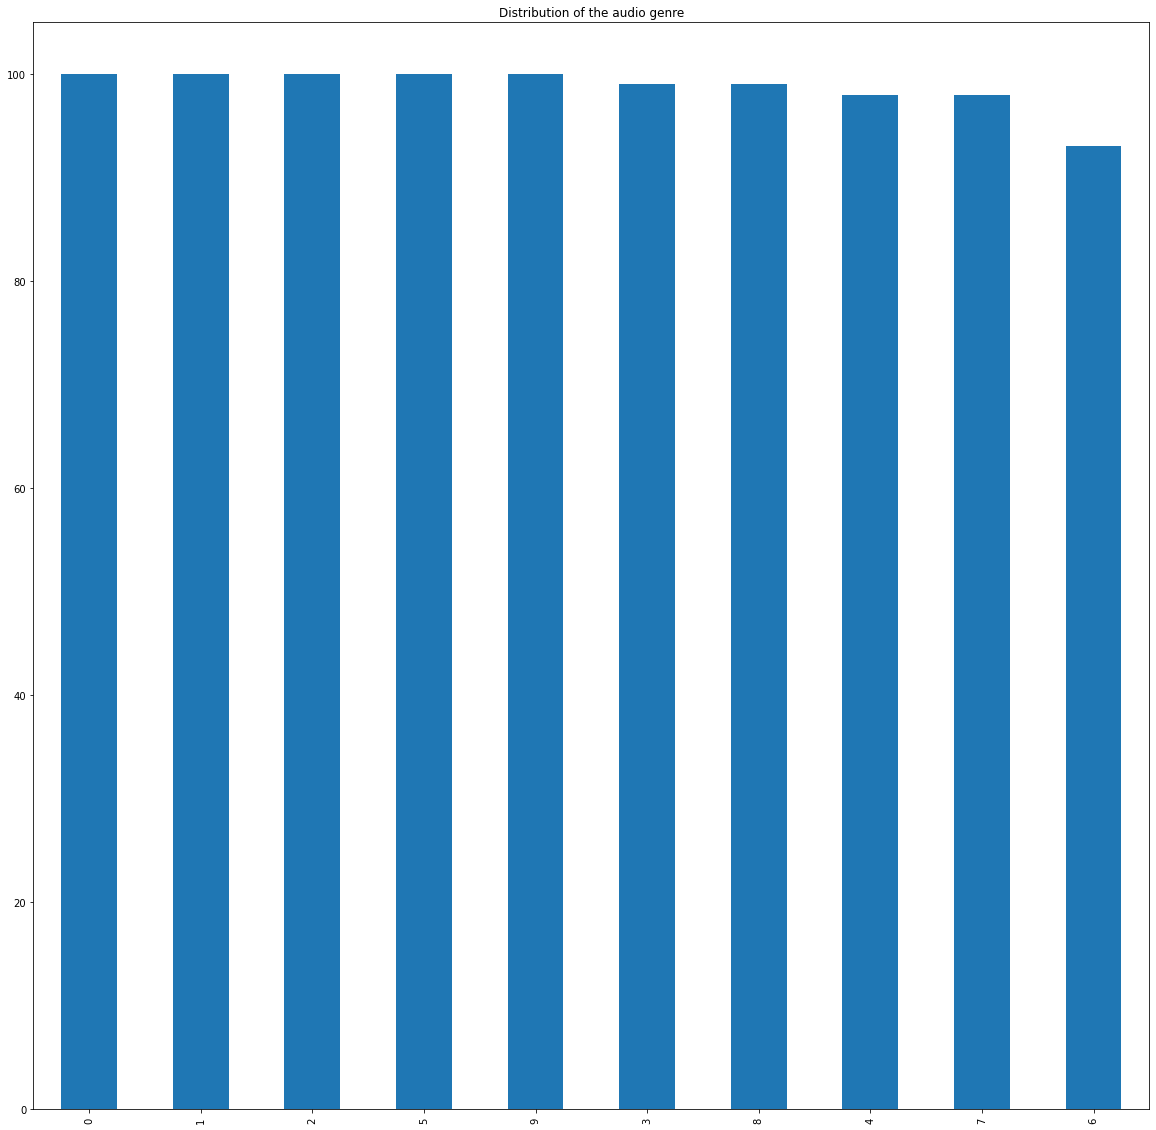

In [22]:
#As stated in the project definition, even distribution of the songs (pretty useless to do this I guess?)

audio.label_encoded.value_counts(dropna = True).plot(kind = 'bar')
plt.title("Distribution of the audio genre");
audio.label_encoded.describe()

In [23]:
#We identified "label" as our target, Yei!

# Split the data into train and test

In [24]:
data = audio.drop(["label_encoded"], axis = 1)
target = audio["label_encoded"]

X = data
y = target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [26]:
target

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: label_encoded, Length: 987, dtype: int32

In [27]:
data

,tempo,spectral_bandwidth,mfcc1,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,103.359375,1956.611056,-26.929785,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,...,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987
1,95.703125,1497.668176,-233.860772,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,...,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485
2,151.999081,1973.643437,-221.802549,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,...,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260
3,184.570312,1567.804596,-207.208080,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,...,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607
4,161.499023,2052.332563,-145.434568,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,...,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,123.046875,2060.825761,-41.402023,-43.945538,54.100395,-18.411090,23.520838,-17.607988,20.660727,-18.454381,...,-15.174259,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201
996,117.453835,2219.090892,-121.410791,-33.497073,41.974745,-25.936361,23.026082,-20.271538,14.354429,-16.350707,...,-16.957086,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224
997,103.359375,1841.748033,-127.946876,1.027332,54.440979,-0.464906,35.829542,-10.860896,16.383278,-10.030961,...,-6.700004,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677
998,112.347147,1653.422860,-98.356322,-46.700574,46.457300,-17.135585,10.505286,-14.554871,16.543108,-12.317913,...,-12.647550,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148


In [28]:
# print the shape of the training data

print("Training Data")
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)


Training Data
Shape of X_train (740, 21)
Shape of y_train (740,)


In [29]:
# print the shape of the test data 

print("Test Data")
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Test Data
Shape of X_test (247, 21)
Shape of y_test (247,)


# Model Training and Performance Evaluation

Decision Tree Classifier

In [30]:
#Lets try a decision tree classifier! YEEEEAAA
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [31]:
# Print the first five predicted vs actual values
print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [6 4 9 3 1]
first five actual values: [6, 4, 9, 6, 1]


In [32]:
#Check evaluation matrics test 
print("accuracy:", round(accuracy_score(y_test, y_pred_dt), 2))
print("recall:", round(recall_score(y_test, y_pred_dt, average = 'macro'), 2))
print("precision:", round(precision_score(y_test, y_pred_dt, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_test,y_pred_dt, average = 'macro'), 2))

accuracy: 0.41
recall: 0.42
precision: 0.41
f1-score: 0.41


C:\Users\HP\miniconda3\envs\newenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


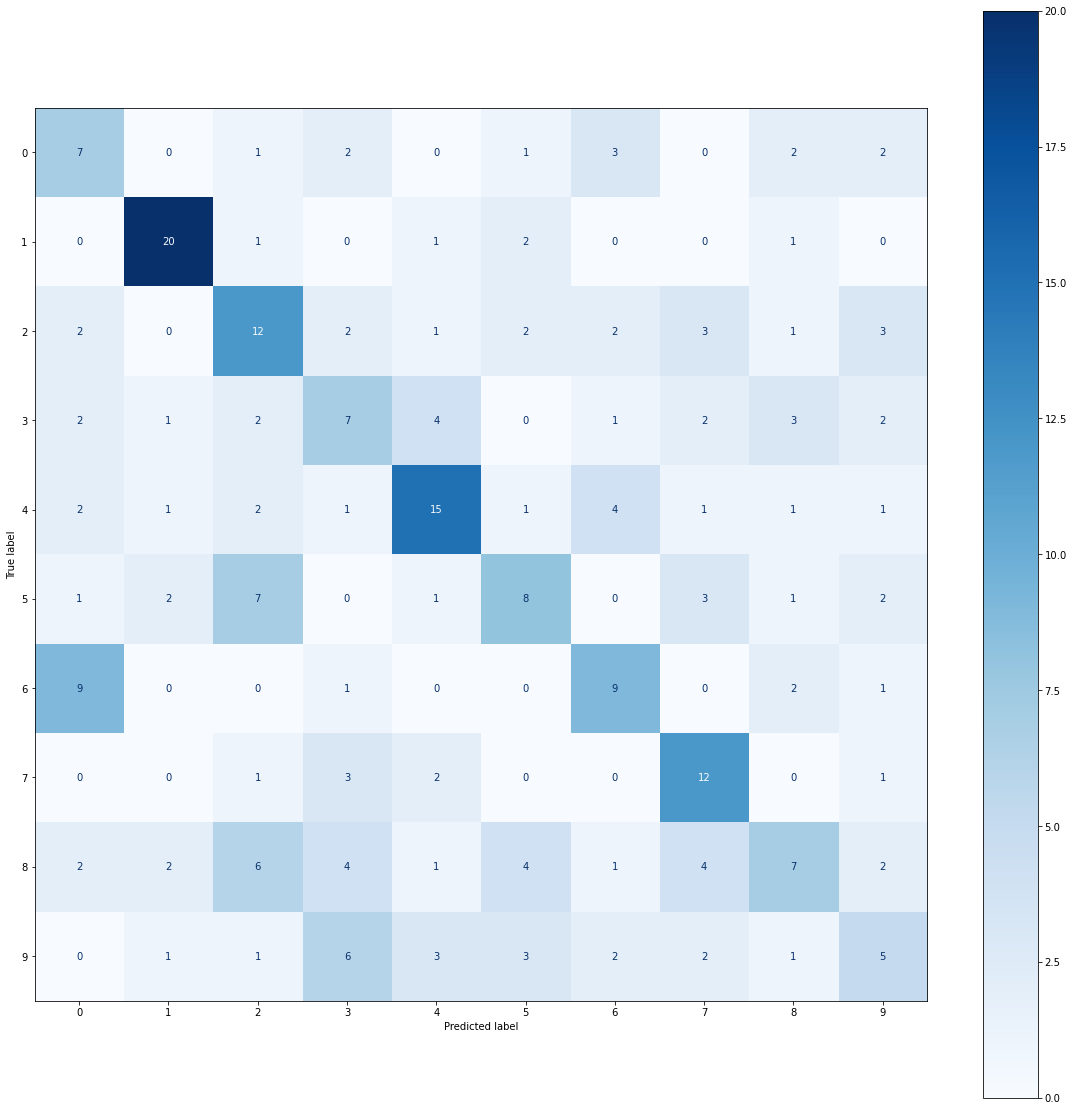

In [33]:
#Confusion matrix
plot_confusion_matrix(dt, 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues);

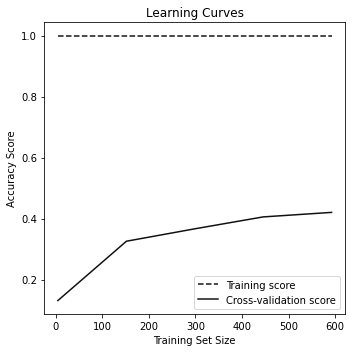

In [34]:
#Plot learning curve
learning_curve_plot(dt, X_train, y_train,None)

XGBoost Classifier

In [35]:
#Now let's try with XGBoot classifier
xgb_model = XGBClassifier(max_depth = 5, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

C:\Users\HP\miniconda3\envs\newenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [36]:
# Print the first five predicted vs actual values
print("first five predicted values:", xgb_predictions[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [6 8 9 6 1]
first five actual values: [6, 4, 9, 6, 1]


In [37]:
#Check evaluation matrics
print("accuracy:", round(accuracy_score(y_test, xgb_predictions), 2))
print("recall:", round(recall_score(y_test, xgb_predictions, average = 'macro'), 2))
print("precision:", round(precision_score(y_test, xgb_predictions, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_test,xgb_predictions, average = 'macro'), 2))

accuracy: 0.54
recall: 0.57
precision: 0.53
f1-score: 0.54


C:\Users\HP\miniconda3\envs\newenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


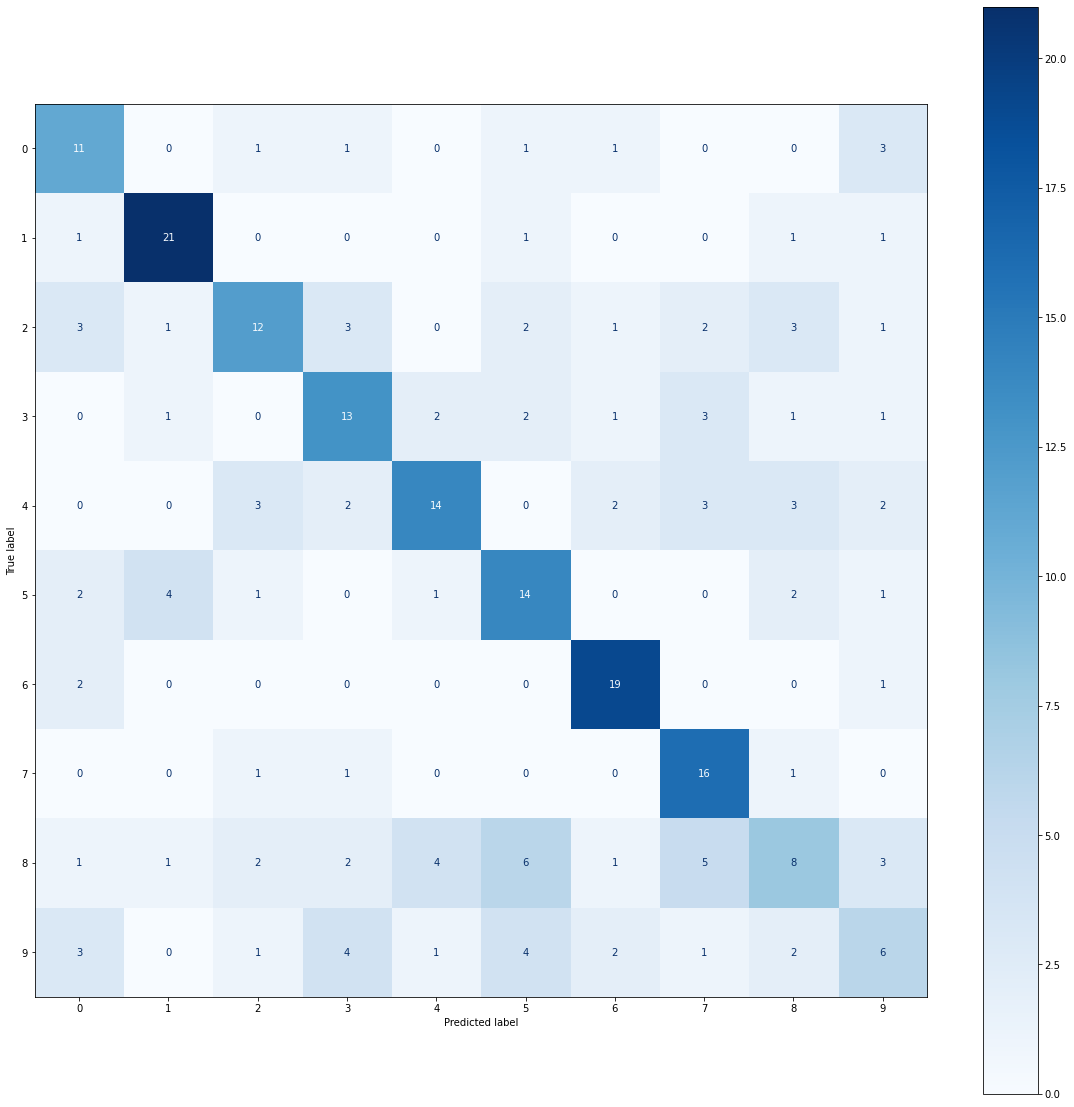

In [38]:
#Confussion matrix
plot_confusion_matrix(xgb_model, 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues);

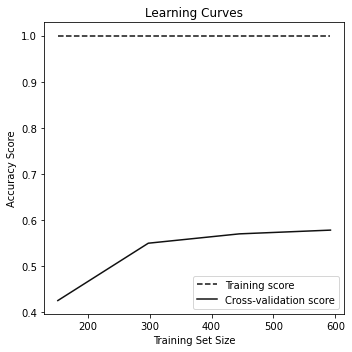

In [39]:
#Plot learning curve
learning_curve_plot(xgb_model, X_train, y_train,None)

In [40]:
#It is improving, but still not what we want

Random Forest Classifier

In [41]:
#Let's try with random forest
rforest_model = RandomForestClassifier().fit(X_train, y_train)
rforest_predictions = rforest_model.predict(X_test)

In [42]:
#Check evaluation matrix test
print("accuracy:", round(accuracy_score(y_test, rforest_predictions), 2))
print("recall:", round(recall_score(y_test, rforest_predictions, average = 'macro'), 2))
print("precision:", round(precision_score(y_test, rforest_predictions, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_test, rforest_predictions, average = 'macro'), 2))


accuracy: 0.58
recall: 0.6
precision: 0.58
f1-score: 0.58


C:\Users\HP\miniconda3\envs\newenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


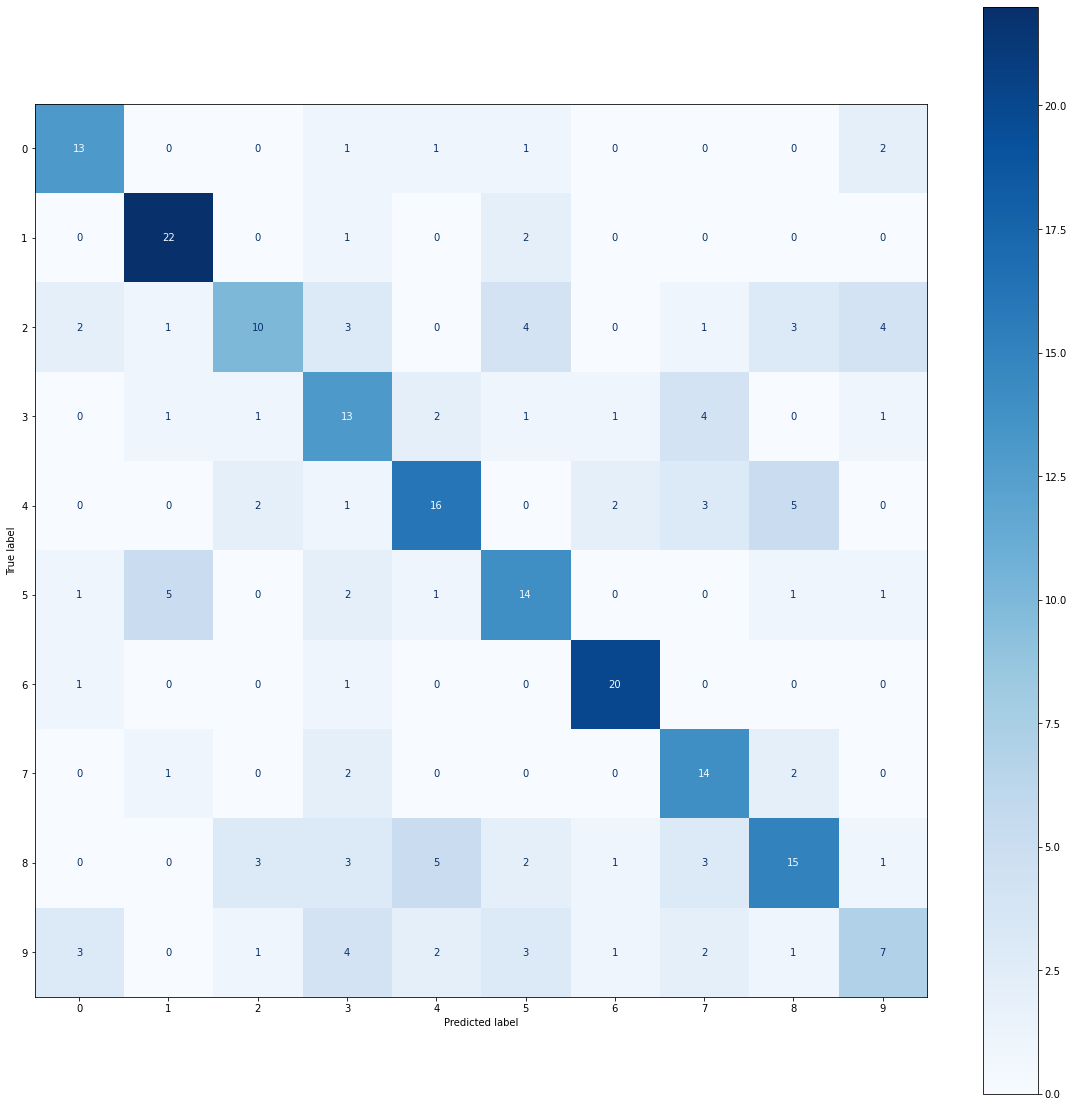

In [43]:
#Confusion matrix 
plot_confusion_matrix(rforest_model, 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues);

In [44]:
#Check with genres are good to be predicted by our model 
print(classification_report(rforest_predictions, y_test))
label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.88      0.73      0.80        30
           2       0.36      0.59      0.44        17
           3       0.54      0.42      0.47        31
           4       0.55      0.59      0.57        27
           5       0.56      0.52      0.54        27
           6       0.91      0.80      0.85        25
           7       0.74      0.52      0.61        27
           8       0.45      0.56      0.50        27
           9       0.29      0.44      0.35        16

    accuracy                           0.58       247
   macro avg       0.60      0.58      0.58       247
weighted avg       0.62      0.58      0.59       247



array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

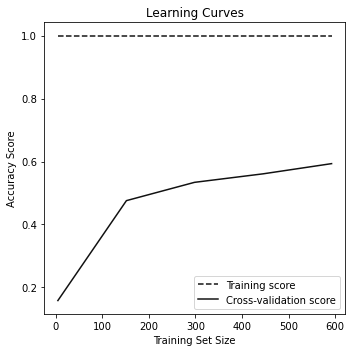

In [45]:
#Plot learning curve
learning_curve_plot(rforest_model, X_train, y_train,None)

# Feature importance plot

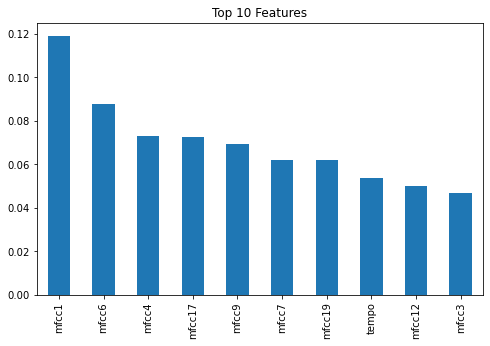

In [46]:
#Decision Tree
feature_importance_plot(dt, X_train, 10)

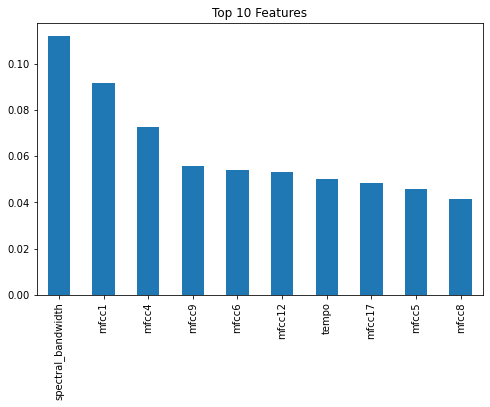

In [47]:
#XGBoost
feature_importance_plot(xgb_model, X_train, 10)

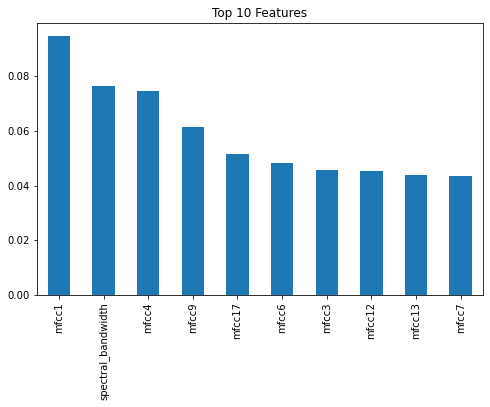

In [48]:
#Random Forest
feature_importance_plot(rforest_model, X_train, 10)

# Hyperparameter Tuning

In [49]:
#Let's search for the best parametes
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, scoring='r2', verbose=1)

In [50]:
#Let's search for the best parametes to tune
random_search.best_params_


{'n_estimators': 95, 'max_features': 0.15000000000000002}

In [51]:
#What will be the best score
random_search.best_score_

0.09845953912035635

# Random Forest Classifier. Second Iteration

In [52]:
#Let's try random forest with the new parametes
rforest_model = RandomForestClassifier(**random_search.best_params_).fit(X_train, y_train)
rforest_predictions = rforest_model.predict(X_test)

In [53]:
# Print the first five predicted vs actual values
print("first five predicted values:", rforest_predictions[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [6 4 9 6 1]
first five actual values: [6, 4, 9, 6, 1]


In [54]:
#Check evaluation matrix test
print("accuracy:", round(accuracy_score(y_test, rforest_predictions), 2))
print("recall:", round(recall_score(y_test, rforest_predictions, average = 'macro'), 2))
print("precision:", round(precision_score(y_test, rforest_predictions, average = 'macro'), 2))
print("f1-score:", round(f1_score(y_test, rforest_predictions, average = 'macro'), 2))

accuracy: 0.61
recall: 0.63
precision: 0.61
f1-score: 0.61


In [55]:
#Our model improved in accuracy, precision and f1 score!

C:\Users\HP\miniconda3\envs\newenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


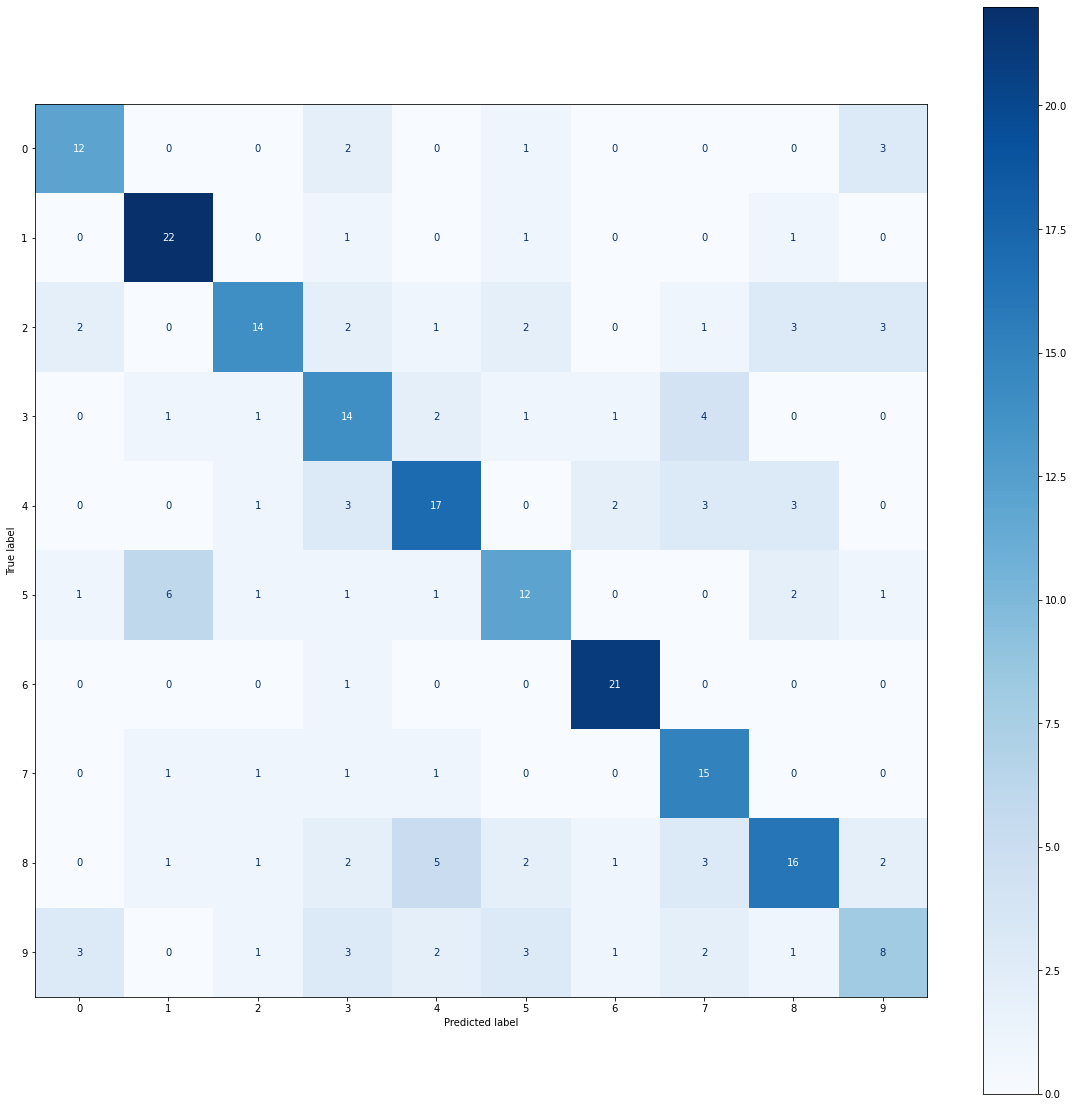

In [56]:
#We check the confusion matrix again
plot_confusion_matrix(rforest_model, 
                      X_test, 
                      y_test,
                      cmap = plt.cm.Blues);

In [57]:
#Check with genres are good to be predicted by our model 
print(classification_report(rforest_predictions, y_test))
label_encoder.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.88      0.71      0.79        31
           2       0.50      0.70      0.58        20
           3       0.58      0.47      0.52        30
           4       0.59      0.59      0.59        29
           5       0.48      0.55      0.51        22
           6       0.95      0.81      0.88        26
           7       0.79      0.54      0.64        28
           8       0.48      0.62      0.54        26
           9       0.33      0.47      0.39        17

    accuracy                           0.61       247
   macro avg       0.63      0.61      0.61       247
weighted avg       0.65      0.61      0.62       247



array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

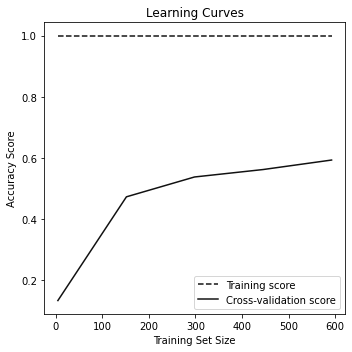

In [58]:
#Plot the learning curve again
learning_curve_plot(rforest_model, X_train, y_train,None)